# Film Industry Analysis for New Studio Strategy

## Introduction
As major companies increasingly invest in original video content, the entertainment landscape is rapidly evolving. Our company has decided to enter the film production space by launching a new movie studio. However, with little to no prior experience in filmmaking, it is crucial that we rely on data-driven insights to make informed strategic decisions.
This notebook aims to explore current trends in the film industry using both box office performance data and audience ratings. By analyzing what kinds of films are performing best financially and critically, we can provide clear, evidence-based recommendations on the types of films our studio should prioritize.

## 1. Business Understanding

In [2]:
import pandas as pd
import sqlite3


print('Finished Importing Succesfully')

Finished Importing Succesfully


## 2. Data Understanding
### 2.1 Data Source
The data used in this project comes from two main sources:

1) **Box Office Mojo (bom.movie_gross.csv)**
This is a compressed CSV file containing box office performance data for a wide range of films. It includes both domestic and international gross earnings by year and studio.

2) **IMDb SQLite Database (im.db.zip)**
This is a zipped SQLite database that contains metadata and user rating information for movies. The relevant tables, `movie_basics` and `movie_ratings`, were merged to support deeper insights.

### Reasons why this Data is sufficient for Analysis
These data sources are appropriate for analyzing the business problem because they combine **financial performance metrics** with **audience and film metadata**. This allows us to identify trends in what types of films are both commercially successful and well-received by viewers—critical insights for a company looking to make informed decisions about the kinds of films their new studio should produce.



### 2.2 Initial Data Exploration
In this section, we import our data from the various sources into our workspace for exploration of it's initial properties

In [3]:
# First, we connect to the 'ím.db' database using SQLite
conn = sqlite3.connect('Data_Folder/im.db/im.db')

##### 1. Overview of 'movie _ratings'

In [4]:
# Let's query the table from the database and store it in a dataframe
query1 = """
    SELECT *
    FROM movie_ratings
"""
df_1 = pd.read_sql_query(query1, conn)

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_1.shape)
print('\nFirst 5 rows:')
display(df_1.head())
print('\nOverall Information:')
df_1.info()
print('\nSummary Description:')
display(df_1.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_1.isnull().sum()


Shape of the Dataset:


(73856, 3)


First 5 rows:


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB

Summary Description:


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06



Missing Values in Each Column:


movie_id         0
averagerating    0
numvotes         0
dtype: int64

##### 2. Overview of 'movie _basics'

In [5]:
# Let's query the table from the database and store it in a dataframe
query2 = """
    SELECT *
    FROM movie_basics
"""
df_2 = pd.read_sql_query(query2, conn)

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_2.shape)
print('\nFirst 5 rows:')
display(df_2.head())
print('\nOverall Information:')
df_2.info()
print('\nSummary Description:')
display(df_2.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_2.isnull().sum()


Shape of the Dataset:


(146144, 6)


First 5 rows:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB

Summary Description:


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000



Missing Values in Each Column:


movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

##### 3. Overview of 'Data_Folder/bom.movie_gross.csv'

In [6]:
# Let's load the csv file into a pandas dataframe
df_3 = pd.read_csv('Data_Folder/bom.movie_gross.csv')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_3.shape)
print('\nFirst 5 rows:')
display(df_3.head())
print('\nOverall Information:')
df_3.info()
print('\nSummary Description:')
display(df_3.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_3.isnull().sum()


Shape of the Dataset:


(3387, 5)


First 5 rows:


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

Summary Description:


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000



Missing Values in Each Column:


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### 4. Overview of merged 'movie_ratings' and 'movie_basics'
The 2 tables from the 'im.db' database can be joined on the 'movie_id' column. However, we lose half the records from the 'movie basics' table by joining.Therefore, we will still have to perform seperate analysis on it even after analysing the merged table to preserve the richness of the data.

In [7]:
# Let's perform an inner join on the 2 tables
df_merged = pd.merge(df_1, df_2, on = 'movie_id', how = 'inner')

# Let's see an overview of the table
print('\nShape of the Dataset:')
display(df_merged.shape)
print('\nFirst 5 rows:')
display(df_merged.head())
print('\nOverall Information:')
df_merged.info()
print('\nSummary Description:')
display(df_merged.describe())

# Check for missing values
print('\nMissing Values in Each Column:')
df_merged.isnull().sum()


Shape of the Dataset:


(73856, 8)


First 5 rows:


,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"



Overall Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB

Summary Description:


,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000



Missing Values in Each Column:


movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

### 2.3 Feature Understanding and Documentation
To support the analysis of film performance and guide our studio’s content strategy, we use features from two datasets: `bom.movie_gross.csv` (Box Office Mojo) and a merged table from `movie_basics` and `movie_ratings` in `im.db` (IMDb metadata and ratings). Below is a breakdown of the features in each dataset.

#### 1. `bom.movie_gross.csv`
This dataset provides financial performance data for films.
- **Identification :**
    - *title*: The name of the film (string)
- **Production :**
    - *studio*: The production or distribution studio responsible for the film (string).
- **Finanicial Metrics :**
    - *domestic_gross*: Total box office revenue earned in the domestic (U.S.) market
    - *foreign_gross*: Total box office revenue earned in international markets *(integer or float)*.

#### 2. IMDb Merged Table: `movie_basic` + `movie_ratings`
This dataset provides financial performance data for films.
- **Identification :**
    - *movie_id*: A unique identifier for each film(string)
- **Titles :**
    - *primary_title* : The title most commonly used(string).
    - *original_title* : The title most commonly used(string).
- **Time :**
    - *start_year*: The year the film was first released
- **Content Characteristics :**
    - *runtime_minutes* : The duration of the film in minutes
    - *genres* : The genre or genres associated with the film.
- **Audience Feedback :**
    - *averagerating* : The average IMDb user rating for the film
    - *numvotes* : The total number of IMDb users who rated the film

These features provide a holistic view of each film by combining:
- **Box office success** (via revenue and studio info),
- **Descriptive and categorical characteristics** (like genre and runtime),
- **Audience sentiment** (via ratings and vote counts), and
- **Temporal context** (release year).

### 2.4 Initial Pattern Analysis
Let's plot some visualisations to get a better feel of the data and it's underlying patterns

#### 1. IMDb Merged Table: `movie_basic` + `movie_ratings`

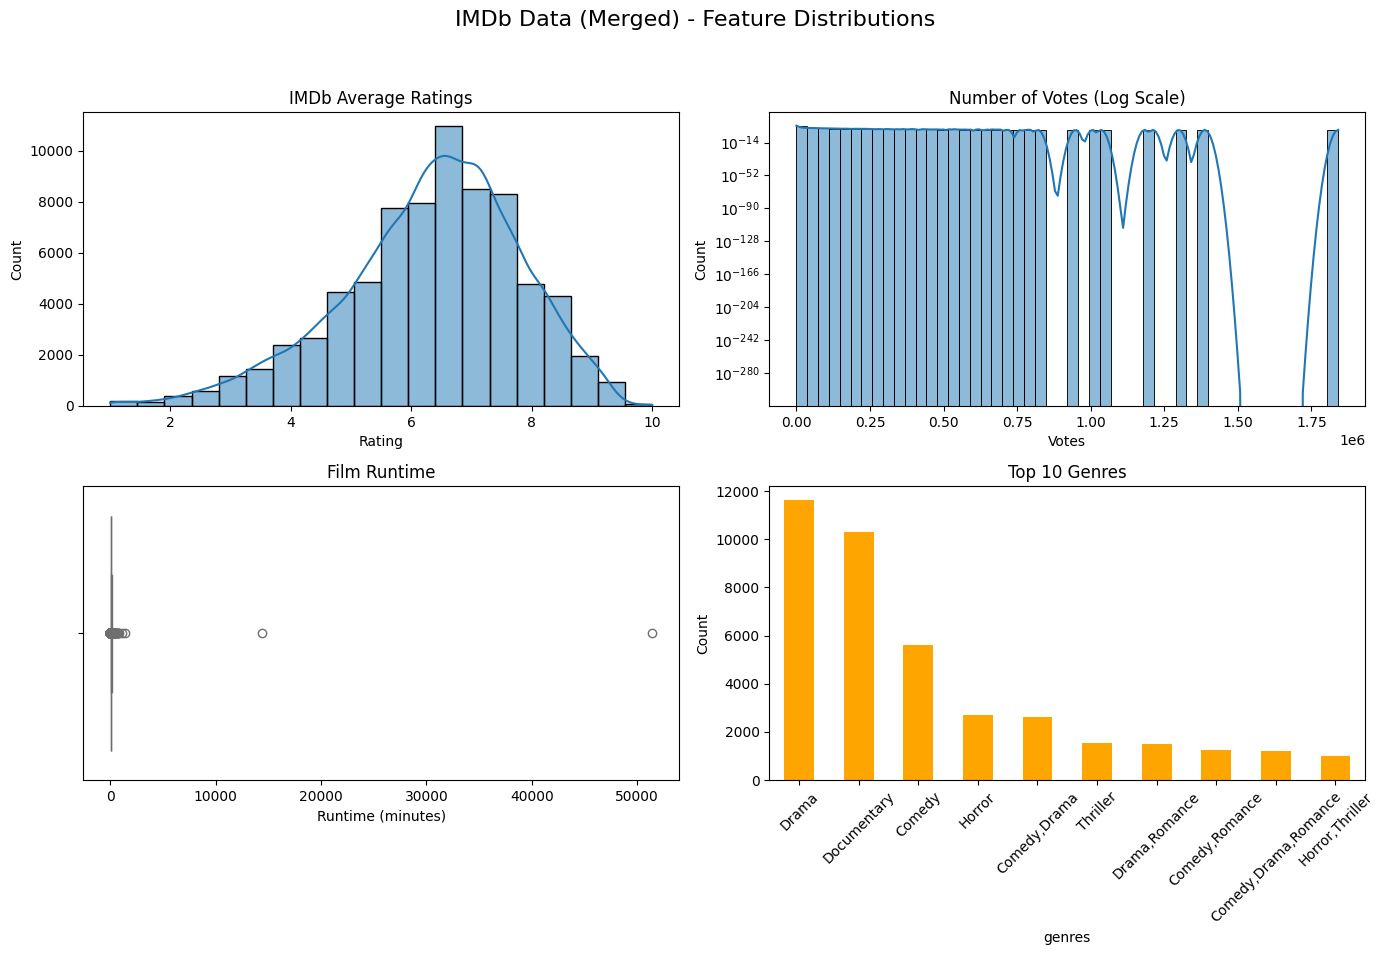

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("IMDb Data (Merged) - Feature Distributions", fontsize=16)

# 1. Average Rating Distribution
sns.histplot(df_merged['averagerating'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("IMDb Average Ratings")
axes[0, 0].set_xlabel("Rating")

# 2. Number of Votes Distribution
sns.histplot(df_merged['numvotes'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Number of Votes (Log Scale)")
axes[0, 1].set_xlabel("Votes")
axes[0, 1].set_yscale("log")

# 3. Runtime Distribution
sns.boxplot(x=df_merged['runtime_minutes'], ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Film Runtime")
axes[1, 0].set_xlabel("Runtime (minutes)")

# 4. Top 10 Genres by Frequency
df_merged['genres'].value_counts().head(10).plot(kind='bar', ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Top 10 Genres")
axes[1, 1].set_ylabel("Count")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##### Insights from the Visualisations

1. IMDb Average Ratings Distribution (**Top Left**)
- Observation: The distribution is approximately normal and centered around 6.5–7.0.
- Insight: Most movies receive moderate ratings, suggesting that extremely high or low ratings are relatively rare.
- Implication: Aim to produce high-quality films that can achieve ratings above the mean (≥ 7.0) to stand out.

2. Number of Votes (**Top Right**)
- Observation: The histogram looks strange. The log scale may not be rendering correctly due to data irregularities or zero values.
- Insight: Popularity (votes) varies dramatically; a small number of films get a disproportionately high number of votes.
- Implication: Consider the characteristics of films with high vote counts — genre, release year, etc.

3. Film Runtime (**Bottom Left**)
- Observation: The boxplot reveals extreme outliers, likely due to incorrect data entries (e.g., movies with runtime over 10,000 minutes).
- Insight: Most runtimes seem to cluster around 90–120 minutes, which is the typical feature film range.
- Implication: For commercial viability, aim for runtimes within the standard range; clean outliers for accurate modeling.


4. Top 10 Genres (**Bottom Right**)
- Observation: The top Genres are Drama, Documentary, Comedy, Horror and Comedy-Drama
- Insight: Drama dominates IMDb listings, followed by non-fiction (documentaries) and comedies.
- Implication: While dramas are most common, niche combinations like Comedy-Drama or Thriller may offer strategic creative angles that balance originality and audience appeal.

#### 2. `bom.movie_gross.csv`

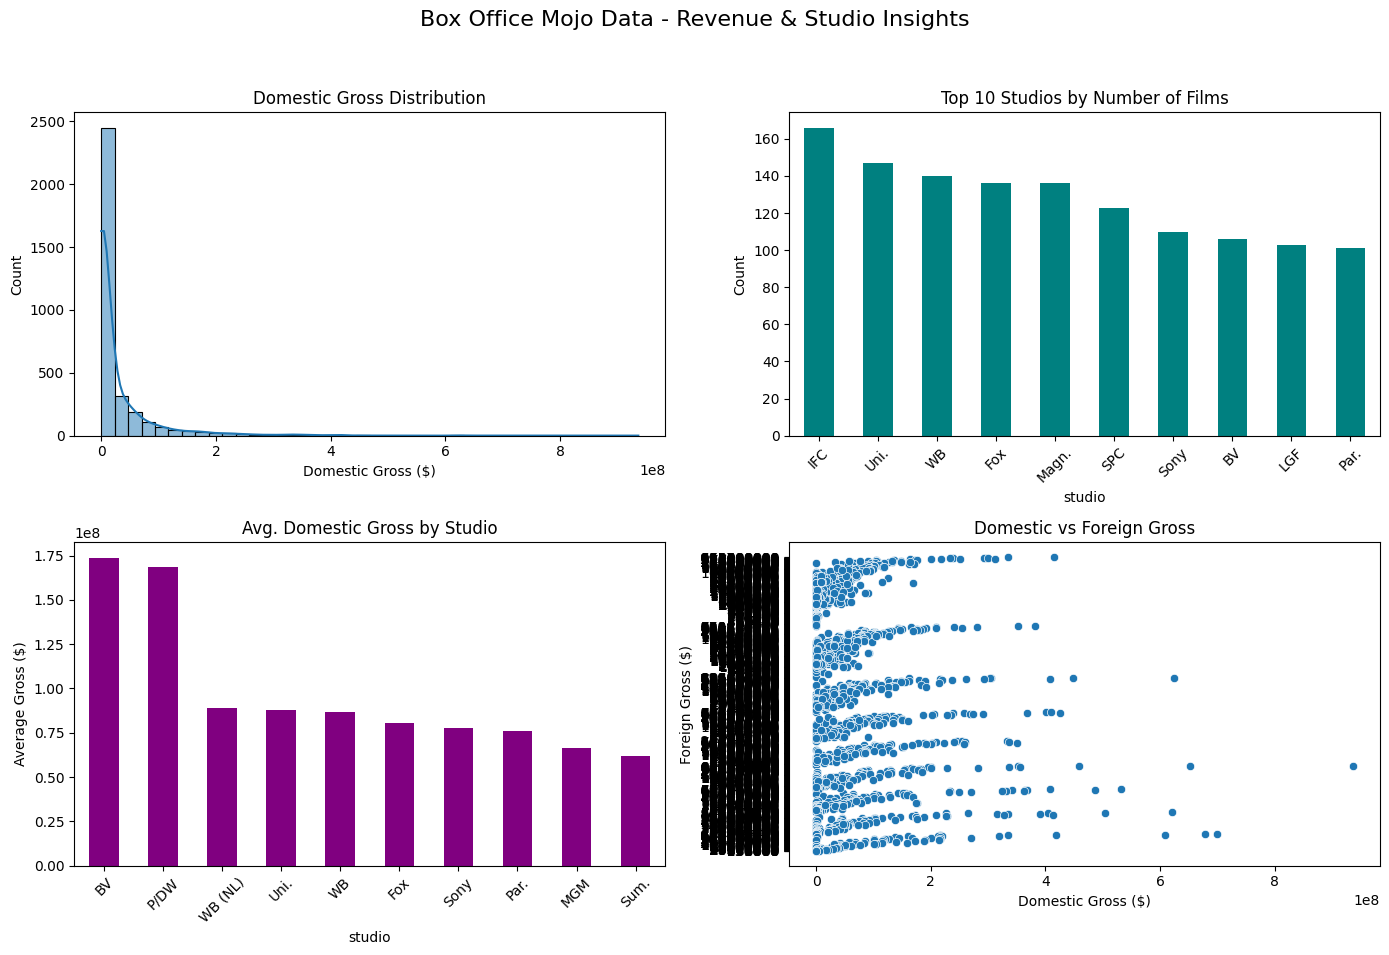

In [ ]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Box Office Mojo Data - Revenue & Studio Insights", fontsize=16)

# 1. Domestic Gross Distribution
sns.histplot(df_3['domestic_gross'], bins=40, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Domestic Gross Distribution")
axes[0, 0].set_xlabel("Domestic Gross ($)")

# 2. Top 10 Studios by Count
df_3['studio'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1], color='teal')
axes[0, 1].set_title("Top 10 Studios by Number of Films")
axes[0, 1].set_ylabel("Count")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Average Domestic Gross by Studio (Top 10)
df_3.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Avg. Domestic Gross by Studio")
axes[1, 0].set_ylabel("Average Gross ($)")
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Domestic vs. Foreign Gross
sns.scatterplot(x='domestic_gross', y='foreign_gross', data=df_3, ax=axes[1, 1])
axes[1, 1].set_title("Domestic vs Foreign Gross")
axes[1, 1].set_xlabel("Domestic Gross ($)")
axes[1, 1].set_ylabel("Foreign Gross ($)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Insights from the Visualisations
1. Domestic Gross Distribution (**Top Left**)
- Observation: Most films earn less than $50 million domestically, with a long tail of very high earners.
- Insight: The box office is highly skewed—only a small number of films become blockbusters.
- Implication: Relying on one massive hit is risky. The studio should diversify its portfolio by producing mid-budget films with high ROI potential rather than chasing only big-budget blockbusters.

2. Top 10 Studios by Number of Films (**Top Right**)
- Observation: IFC, Universal (Uni.), WB, and Fox have the highest number of released films.
- Insight: These studios succeed partly by producing high volumes of content, often across various genres and budgets.
- Implication: A new studio can learn from this strategy by establishing a pipeline of consistent releases to build presence—but it should first focus on quality and market differentiation before scaling up.

3. Avg. Domestic Gross by Studio (**Bottom Left**)
- Observation: Buena Vista (Bv), Pixar/Disney (P/DW), and Warner Bros. (WB) top the list with the highest average grosses.
- Insight: Studios tied to major franchises or brands (e.g., Disney/Pixar) yield higher per-film returns.
- Implication: A new studio should explore building or licensing original IPs or franchise-like storytelling elements to boost per-film earnings over time, even if starting small.

4. Domestic vs. Foreign Gross (**Bottom Right**)
- Observation: There’s a loose positive trend—films with high domestic earnings tend to perform well internationally, though with many exceptions.
- Insight: Some films clearly overperform in either the domestic or international market, suggesting differing audience tastes.
- Implication: The studio should plan with global markets in mind from the start—incorporating universal themes, minimal cultural localization requirements, and strong visual storytelling to maximize global revenue.

## 3. Data Preparation

Data Cleaning and Preprocessing.

We will focus on data cleaning and preprocessing of our data in this section. This will ensure it is ready for data analysis. This involves handling of duplicates and missing values, 

### 

3.1 Cleaning and Preparing the "bom.movie_gross.csv"

In [10]:
df = pd.read_csv('Data_Folder/bom.movie_gross.csv')

#checking for duplicate rows
duplicate_bool = df.duplicated()
num_duplicates = duplicate_bool.sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')

#display duplicate rows for inspection
if num_duplicates > 0:
    print('\nDuplicate Rows:')
    display(df[duplicate_bool])
else:
    print('\nNo duplicate rows found.')


#Display data types of each column
print('\nData Types of Each Column:')
print(df.dtypes)
#check if any columns have mixed data types
for col in df.columns:
    unique_types = df[col].map(type).unique()
    if len(unique_types) > 1:
        print(f"Warning: Column '{col}' has mixed data types: {unique_types}")


#Checking for missing values
missing_counts = df.isnull().sum()
#Show columns with missing values
missing_columns = missing_counts[missing_counts > 0]
if not missing_columns.empty:
    print('\nColumns with Missing Values and their counts:')
    print(missing_columns)
else:
    print('\nNo missing values found in the dataset.')



Number of duplicate rows: 0

No duplicate rows found.

Data Types of Each Column:
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Columns with Missing Values and their counts:
studio               5
domestic_gross      28
foreign_gross     1350
dtype: int64


3.2 Converitng non-string values in 'studio' to "NaN"

In [11]:
#importing necessary library
import numpy as np

#converitng non-string values in studio column to string
df['studio'] = df['studio'].apply(lambda x: x if isinstance(x, str) else np.nan)

print("unique types in 'studio' after cleaning:")
print(df['studio'].map(type).unique())

#show all non_string values in the 'studio' column
non_strings = df[df['studio'].map(type) != str]
print(non_strings['studio'].unique())




unique types in 'studio' after cleaning:
[<class 'str'> <class 'float'>]
[nan]


3.3 Converting 'foreign_gross' data to float.

In [12]:
#first, remove commas(if any)
df['foreign_gross'] = df['foreign_gross'].replace(',', '', regex=True)
#then convert non-numeric values to NaN
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

#check the new data type
print(df['foreign_gross'].dtype)

float64


3.4 Visualizing missing values with seaborn and matplotlib.

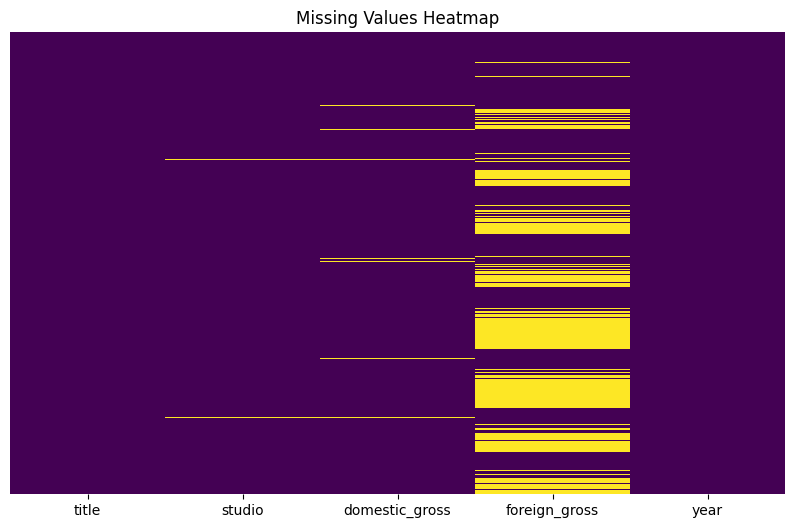

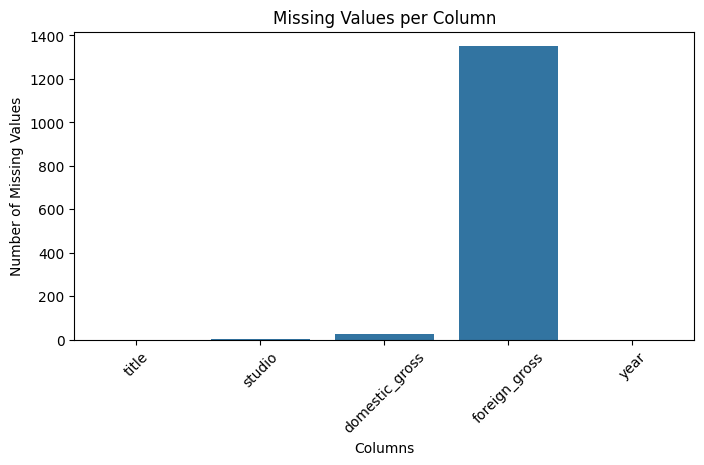

In [13]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#create a boolean dataframe for missing values
missing = df.isnull()

#plotting a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#bar plot of missing values count per column
missing_counts = df.isnull().sum()
plt.figure(figsize=(8, 4))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45)
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

3.5 Handling missing data.

In [14]:
#handling missing values in each column
df['studio'] = df['studio'].fillna('Unknown')  # Fill missing studio names with 'Unknown' cause it only has 5 missing values
df['domestic_gross'] = df['domestic_gross'].fillna(0)  # missing values can mean the movie had no domestic gross recorded
df['foreign_gross'] = df['foreign_gross'].fillna(0)  # missing values can mean the movie had no foreign gross recorded

#To confirm no missing values remain.
print("missing values after cleaning:")
print(df[['studio', 'domestic_gross', 'foreign_gross']].isnull().sum())

#saving the cleaned dataframe to a new csv file
df.to_csv('Data_Folder/cleaned_bom_movie_gross.csv', index=False)


missing values after cleaning:
studio            0
domestic_gross    0
foreign_gross     0
dtype: int64


3.6 Data cleaning and preparation for 'im.db' file

3.6.1 Movie_ratings.

In [15]:
#connecting to the database
conn = sqlite3.connect('Data_Folder/im.db/im.db')
#load movie_ratings table from the database
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
# show initialshape of the table
print("initial shape of movie_ratings:",movie_ratings.shape)

# Check for duplicates in the movie_ratings table
duplicates = movie_ratings[movie_ratings.duplicated()]
print(f"nNumber of duplicate rows:{duplicates.shape[0]}")
print("sample duplicate rows:")
print(duplicates.head())

#Check for missing values
missing_values = movie_ratings.isnull().sum()
print("Missing values per column:")
print(missing_values)

#percentage of missing values
missing_percent = (movie_ratings.isnull().sum() / len(movie_ratings)) * 100
print("\npercentage of missing values per column:")
print(missing_percent)

initial shape of movie_ratings: (73856, 3)
nNumber of duplicate rows:0
sample duplicate rows:
Empty DataFrame
Columns: [movie_id, averagerating, numvotes]
Index: []
Missing values per column:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

percentage of missing values per column:
movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64


3.6.2 Movie_basics 

In [16]:
# Load movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)

# Check initial shape
print("Initial shape of movie_basics:", movie_basics.shape)

# Check for duplicates
duplicates = movie_basics[movie_basics.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Check missing values
missing_values = movie_basics.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Percentage of missing values
missing_percent = (movie_basics.isnull().sum() / len(movie_basics)) * 100
print("\nPercentage of missing values per column:")
print(missing_percent)


Initial shape of movie_basics: (146144, 6)
Number of duplicate rows: 0
Missing values per column:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Percentage of missing values per column:
movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64


In [17]:
# Handle missing values
# For runtime_minutes, fill with median 
runtime_median = movie_basics['runtime_minutes'].median()
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(runtime_median)

# For genres, create 'Unknown' category
movie_basics['genres'] = movie_basics['genres'].fillna('Unknown')

# For original_title (only 21 missing), we can fill with primary_title
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

# Verify no missing values remain
print("\nMissing values after cleaning:")
print(movie_basics.isnull().sum())


Missing values after cleaning:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


 # 3.7 Merging IMDb Tables

In [18]:
# Merge movie_basics and movie_ratings on movie_id
imdb_merged = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

In [19]:
# Check the merged dataframe
print("Shape of merged IMDb data:", imdb_merged.shape)
print("\nFirst 5 rows:")
display(imdb_merged.head())

Shape of merged IMDb data: (73856, 8)

First 5 rows:


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [20]:
# Check for missing values in merged data
print("\nMissing values in merged data:")
print(imdb_merged.isnull().sum())


Missing values in merged data:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


# 3.8 Merging IMDb Data with Box Office Data

In [21]:
# Load cleaned box office data
bom_movies = pd.read_csv('Data_Folder/cleaned_bom_movie_gross.csv')

In [22]:
# We'll merge on title and year, but need to handle potential title mismatches
# First, standardize titles by making them lowercase and removing punctuation
import re

def clean_title(title):
    if isinstance(title, str):
        title = title.lower()
        title = re.sub(r'[^a-z0-9\\s]', '', title)
        return title.strip()
    return title

# Apply cleaning to both datasets
imdb_merged['clean_title'] = imdb_merged['primary_title'].apply(clean_title)
bom_movies['clean_title'] = bom_movies['title'].apply(clean_title)

# Merge on clean_title and year
merged_data = pd.merge(
    imdb_merged,
    bom_movies,
    left_on=['clean_title', 'start_year'],
    right_on=['clean_title', 'year'],
    how='inner'
)


In [23]:
# Drop unnecessary columns and duplicates
merged_data = merged_data.drop(columns=['clean_title', 'title', 'year'])
merged_data = merged_data.drop_duplicates(subset=['movie_id'])

print("Shape of final merged dataset:", merged_data.shape)
print("\nColumns in final dataset:", merged_data.columns.tolist())

Shape of final merged dataset: (1973, 11)

Columns in final dataset: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio', 'domestic_gross', 'foreign_gross']


In [24]:
# Calculate total gross (domestic + foreign)
merged_data['total_gross'] = merged_data['domestic_gross'] + merged_data['foreign_gross']


In [25]:
# Save cleaned merged data for analysis
merged_data.to_csv('Data_Folder/final_merged_movie_data.csv', index=False)


In [26]:
# Close database connection
conn.close()


#  Film Industry Analysis for New Movie Studio


## Analysis Introduction
### This analysis aims to identify what types of films are currently performing best at the box office and which studios are the best to guide our new movie studio's content strategy. We'll examine three key relationships:

 ## 1. Genre Popularity & Trends
 **Key Variables:**
 - `genres`  
 - `averagerating`  
 - `total_gross` 
  
 **Why These Matter:**  
 Determine which genres are most profitable (highest revenue) and most appreciated by audiences (highest ratings).


## 2. Studio Performance Analysis
 **Key Variables:**  
 - `average_rating` 
 - `total_gross` 
  
 **Why These Matter:**  
Studio perfomance helps a new movie studio identify, succesful production and distribution partners and potential competitive positioning

## 3. Audience Preferences  Analysis
 **Key Variables:**  
 - `averagerating` 
  
 **Why These Matter:**  
 Understand the relationship between ratings and revenue to balance artistic quality and commercial success.

 ## Expected Insights
 By the end of this analysis, we'll provide actionable recommendations on:  
 1. Which genres to prioritize for production  
 2. Which studios are most succesful
 3. Do high ratings lead to higher revenue

 **Note on Data Selection:**  
 These specific variables were chosen because they:  
 - Are consistently available across datasets  
 - Represent controllable business decisions (genre, release timing)  
 - Directly measure success (revenue, ratings)  
 - These variables naturally led to the 3 chosen approaches

# 4. Analysis

## 4.1 Genre Profitability Analysis
### Goal:
- Understand which movie genres are most profitable (highest average revenue)
- Understand which genres are most appreciated by audiences (highest average rating)

### Method:
- Some movies have multiple genres we explode them so each genre appears in a separate row
- Group data by genre and calculate:
    - Average gross revenue
    - Median gross revenue
    - Movie count per genre
    - Average IMDb rating

In [27]:
# Split genres into separate rows
genre_data = merged_data.copy()
genre_data['genres'] = genre_data['genres'].str.split(',')
genre_data = genre_data.explode('genres')

In [28]:
# Group by genre and compute stats
genre_group = genre_data.groupby('genres').agg(
    avg_gross = ('total_gross', 'mean'),
    median_gross = ('total_gross', 'median'),
    movie_count = ('total_gross', 'count'),
    avg_rating = ('averagerating', 'mean')
).sort_values('avg_gross', ascending=False)

In [29]:
# Filter significant genres (>= 20 movies)
top_genres = genre_group[genre_group['movie_count'] >= 20].head(10)


In [30]:
# Display top genres
print("Top Performing Genres by Average Revenue:")
display(top_genres)

Top Performing Genres by Average Revenue:


,avg_gross,median_gross,movie_count,avg_rating
genres,,,,
Sci-Fi,3.339870e+08,240900000.0,114,6.516667
Adventure,3.187726e+08,205000000.0,385,6.462597
Animation,3.167134e+08,237050000.0,122,6.592623
Fantasy,2.273519e+08,91600000.0,137,6.281022
Action,1.883243e+08,70550000.0,552,6.330616
Family,1.497539e+08,75700000.0,91,6.018681
Comedy,1.047134e+08,32500000.0,700,6.179714
Thriller,1.038097e+08,37600000.0,299,6.255184
Mystery,8.769629e+07,35750000.0,142,6.292958


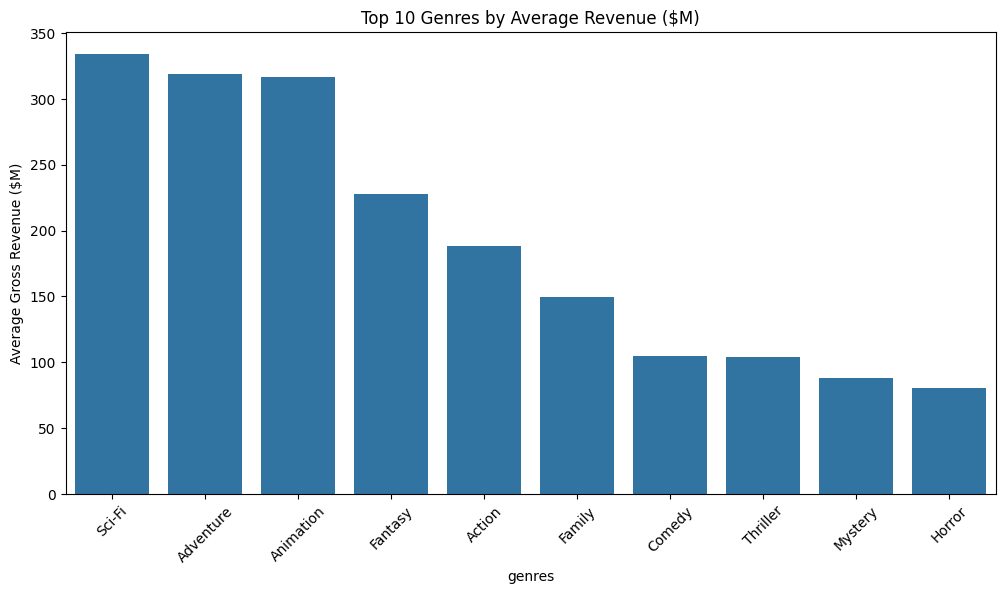

In [31]:
# Plot: Revenue against genre
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index, y=top_genres['avg_gross']/1e6)
plt.title('Top 10 Genres by Average Revenue ($M)')
plt.ylabel('Average Gross Revenue ($M)')
plt.xticks(rotation=45)
plt.show()

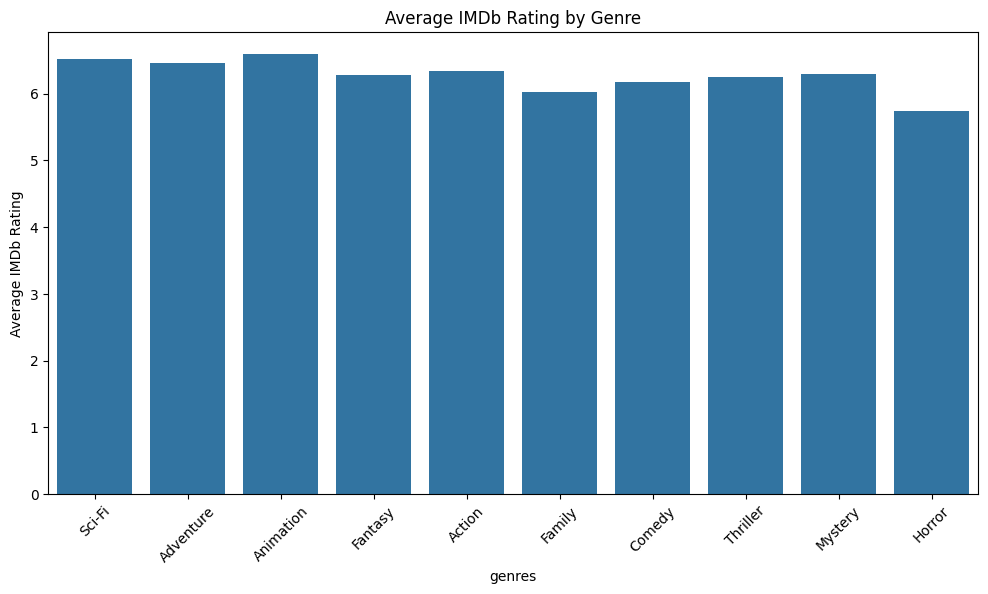

In [32]:
# Plot: Rating against genre
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index, y=top_genres['avg_rating'])
plt.title('Average IMDb Rating by Genre')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.show()


 **Key Findings:**
1. Sci-Fi, Adventure & Animation genres generate the highest average revenue.
2. Sci-Fi genres achieve both high revenues and high IMDb ratings a good commercial and critical performance.
3. Animation also shows strong ratings and very high revenue a good genre for both family and general audience markets.


## 4.2 Studio Performance Analysis
### Goal:
This helps identify which studios consistently produce highly-rated films. Understanding studio performance is crucial for strategic partnerships, distribution planning, and benchmarking success.


### Method:
- Grouped the merged dataset by studio
- Calculated:
    - Average total gross revenue
    - Number of films per studio
    - Average IMDb rating
- Filtered to studios with atleast 5 movies
- Displayed top 10 studios by average revenue
- Visualized studio vs average revenue 

In [33]:
 # Filter out studios with very few movies (keep studios with at least 5 movies)
studio_stats = merged_data.groupby('studio').agg({
    'total_gross': ['mean', 'median', 'count'],
    'averagerating': 'mean'
}).sort_values(('total_gross', 'mean'), ascending=False)


In [34]:
# Filter for statistically significant studios
significant_studios = studio_stats[studio_stats[('total_gross', 'count')] >= 5]


In [35]:
# Take top 10 studios by average revenue
top_studios = significant_studios.head(10)

In [36]:
# Display the table
print("Top Performing Studios by Average Revenue:")
display(top_studios)

Top Performing Studios by Average Revenue:


total_gross                    averagerating
                 mean       median count          mean
studio                                                
P/DW     5.076500e+08  524950000.0    10      6.760000
BV       4.296776e+08  284200000.0    87      6.956322
WB       2.434465e+08  128200000.0   114      6.642982
Fox      2.323818e+08  167800000.0   117      6.362393
WB (NL)  2.310976e+08  153400000.0    42      6.245238
Sony     2.080057e+08  148600000.0    88      6.290909
Par.     2.068802e+08  134500000.0    82      6.402439
Uni.     2.068196e+08  129650000.0   128      6.256250
Sum.     1.522979e+08   58150000.0    14      6.264286
LG/S     1.322693e+08   88700000.0    35      6.454286

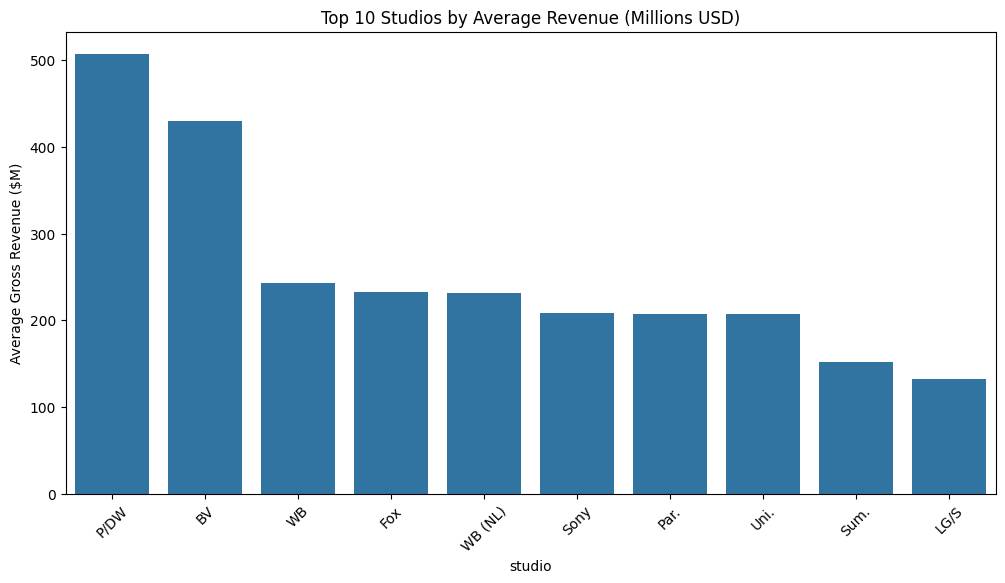

In [37]:
# Visualization: Studio vs. Revenue
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_studios.index,
    y=top_studios[('total_gross', 'mean')] / 1e6  # in millions
)
plt.title('Top 10 Studios by Average Revenue (Millions USD)')
plt.ylabel('Average Gross Revenue ($M)')
plt.xticks(rotation=45)
plt.show()


**Key Findings:**
1. The two studios P/DW and BV have the best average revenue which makes them the best candidates to partner with

## 4.3 Audience Preferences (Ratings vs. Revenue)
### Goal:
- Understand relationship between IMDb ratings and total revenue
- Identify which rating ranges are most commercially successful


### Method:
- Create rating tiers:
    - <5
    - 5-6
    - 6-7
    - 7-8
    - 8+
- Group data by rating tier and calculate:
    - Average revenue
    - Median revenue
    - Movie count per tier
    - Average rating
- Plot scatter of individual movie ratings vs. total gross
- Compute correlation between rating and revenue

In [38]:
# Create rating tiers
rating_data = merged_data.copy()
rating_data['rating_tier'] = pd.cut(
    rating_data['averagerating'],
    bins=[0,5,6,7,8,10],
    labels=['<5', '5-6', '6-7', '7-8', '8+']
)


In [39]:
# Group by rating tier
rating_group = rating_data.groupby('rating_tier').agg(
    avg_gross = ('total_gross', 'mean'),
    median_gross = ('total_gross', 'median'),
    movie_count = ('total_gross', 'count'),
    avg_rating = ('averagerating', 'mean')
)

C:\Users\USER\AppData\Local\Temp\ipykernel_16580\3501002883.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group = rating_data.groupby('rating_tier').agg(


In [40]:
# Display rating tier performance
print("Performance by Rating Tier:")
display(rating_group)

Performance by Rating Tier:


,avg_gross,median_gross,movie_count,avg_rating
rating_tier,,,,
<5,5.166465e+07,10054800.0,166,4.308434
5-6,6.968246e+07,19699999.0,445,5.619775
6-7,1.003219e+08,27200000.0,806,6.536352
7-8,1.566118e+08,30800000.0,499,7.448898
8+,2.337414e+08,49000000.0,57,8.271930


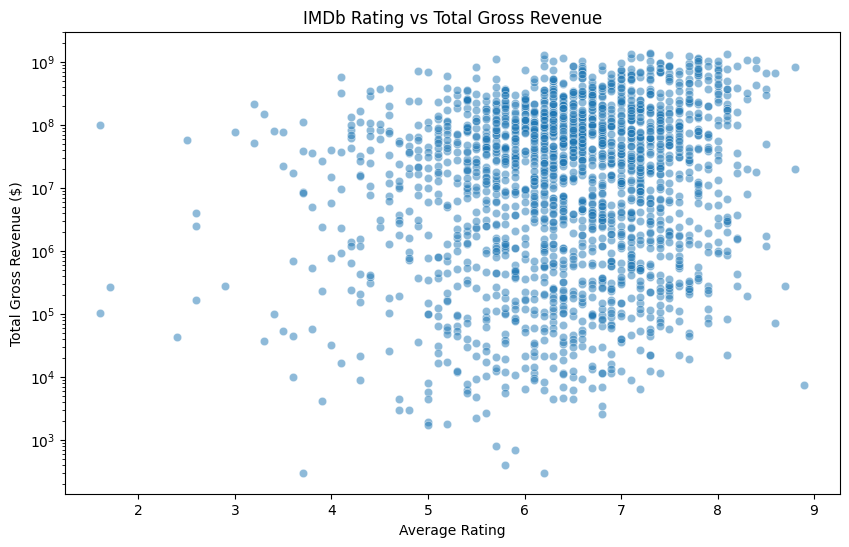

In [41]:
# Plot: IMDb Rating vs Revenue scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x='averagerating', y='total_gross', data=rating_data, alpha=0.5)
plt.yscale('log')
plt.title('IMDb Rating vs Total Gross Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Revenue ($)')
plt.show()


In [42]:
# Correlation
corr = rating_data['averagerating'].corr(rating_data['total_gross'])
print(f"Correlation between rating and revenue: {corr:.2f}")

Correlation between rating and revenue: 0.20


**Key Findings:**
1. Weak positive correlation (r=0.20) between ratings and revenue — higher ratings are slightly associated with higher revenue.
2. range 6-7 performs best commercially mass-appeal films that attract large audiences.
3. Blockbuster franchises perform well even with mid-range ratings.
4. Highest rated movies (>8) have more modest commercial performance.

## CONCLUSION
The analysis reveals:

1. Sci-Fi, Adventure, and Animation are the best genres for profitability and audience appeal.
2. Partnering with top-performing studios can enhance production quality and distribution.
3. Balancing revenue and ratings requires a mixed strategy—focusing on blockbusters for income and critically acclaimed projects for reputation.

